Link: https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner/notebook

# 1. Setup

In [19]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Cleaning
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer, 
    OrdinalEncoder, 
    OneHotEncoder,
    StandardScaler
)

# Model
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

# Helpers
from helpers.pandas_helpers import df_null_info

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("./data/titanic_train.csv")

In [3]:
# train = pd.read_csv("./data/titanic_train.csv")
# test = pd.read_csv("./data/titanic_test.csv")

# 2. EDA

## Exploration

In [4]:
train = data.copy()

In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Types

Numeric:

* PassengerId
* Survived
* Pclass
* Age
* SibSp
* Parch
* Fare

Categorical:

* Name
* Sex
* Ticket
* Cabin
* Embarked

## Percent Null

In [8]:
train_nulls = df_null_info(train)
display(train_nulls)

,Column,Dtype,Nulls,Total,Percent Null
0,PassengerId,int64,0,891,0.000
1,Survived,int64,0,891,0.000
2,Pclass,int64,0,891,0.000
3,Name,object,0,891,0.000
4,Sex,object,0,891,0.000
5,Age,float64,177,891,0.199
6,SibSp,int64,0,891,0.000
7,Parch,int64,0,891,0.000
8,Ticket,object,0,891,0.000
9,Fare,float64,0,891,0.000


* Age: 20%
  * Will fill-in gaps
* Cabin
  * Will likely drop

# 3. Visualize

## Sex

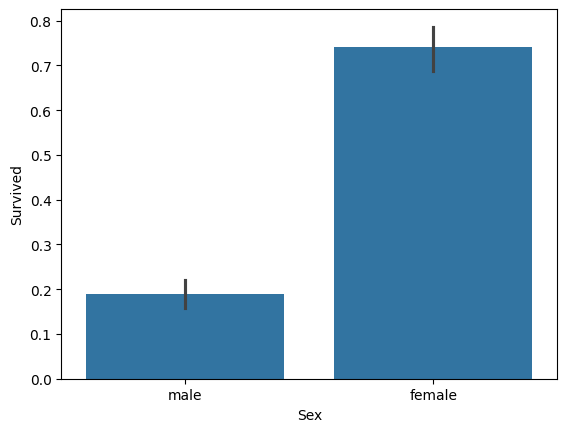

In [9]:
#draw a bar plot of survival by sex
_ = sns.barplot(x="Sex", y="Survived", data=train)

## Class

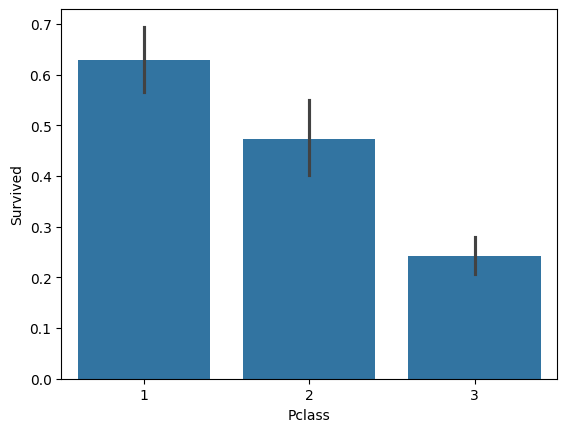

In [10]:
_ = sns.barplot(x="Pclass", y="Survived", data=train)

## SibSp

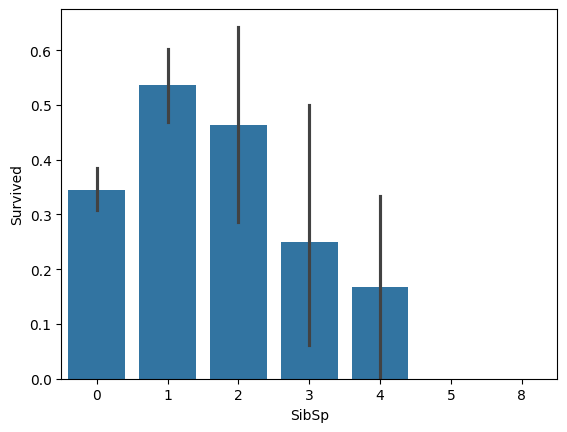

In [11]:
sns.barplot(x="SibSp", y="Survived", data=train)
plt.show()

## Parch

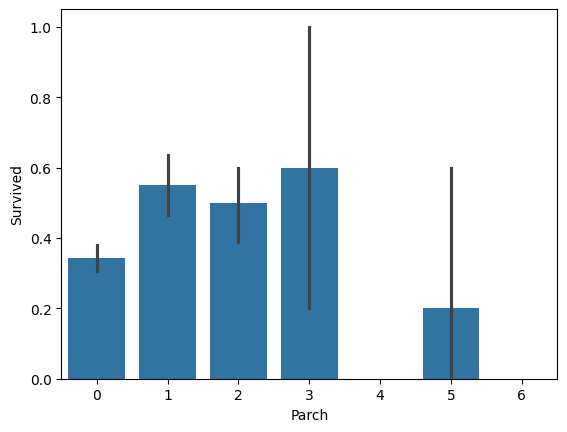

In [12]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

## Age

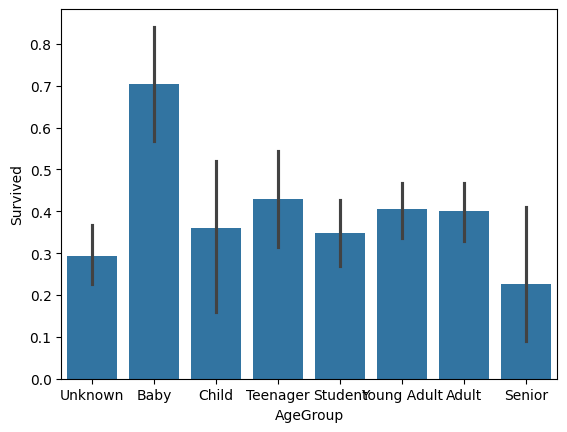

In [13]:
#sort the ages into logical categories
age_review_df = train.copy()

age_review_df["Age"] = age_review_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
age_review_df['AgeGroup'] = pd.cut(age_review_df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=age_review_df)
plt.show()

# 4. Cleaning

## Strategy

7 Features:

| Column      | DType   | Strategy                                      |
| ----------- | ------- | --------------------------------------------- |
| PassengerId | int64   | Drop                                          |
| Survived    | int64   | Target, Drop NA                               |
| Pclass      | int64   | SimpleImputer (most frequent)                 |
| Name        | object  | Drop                                          |
| Sex         | object  | SimpleImputer (most frequent), OneHotEncoding |
| Age         | float64 | SimpleImputer (most frequent)                 |
| SibSp       | int64   | SimpleImputer (most frequent)                 |
| Parch       | int64   | SimpleImputer (most frequent)                 |
| Ticket      | object  | Drop                                          |
| Fare        | float64 | SimpleImputer (mean), StandardScaler          |
| Cabin       | object  | Drop                                          |
| Embarked    | object  | SimpleImputer (most frequent), OrdinalEncoder |

## Feature Pipeline

**Note on Embarked**

The Titanic first embarked from Southampton, England. Its first 
stop was at Cherbourg, France. The last stop of the titanic was at 
Queenstown, Ireland. Thus, the order of embarkment is S, C, Q.

In [14]:
# Sex
sex_pipeline = Pipeline([
    ('SimpleImputing', SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoding', OneHotEncoder(sparse_output=False))
])

# Fare
fare_pipeline = Pipeline([
    ('SimpleMeanImputer', SimpleImputer(strategy='mean')),
    ('StandardScaler', StandardScaler())
])

# Embarked
# embark_order = ['S', 'C', 'Q']
embark_pipeline = Pipeline([
    ('SimpleImputing', SimpleImputer(strategy='most_frequent')),
    # ('OrdinalEncoding', OrdinalEncoder(categories=embark_order)),
    ('OrdinalEncoding', OrdinalEncoder()),
])

# Pclass, Age, SibSp, Parch (Simple Imputer - Most Frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Assemble
cleaning_pipeline = ColumnTransformer([
    ('Sex', sex_pipeline, ['Sex']),
    ('Fare', fare_pipeline, ['Fare']),
    ('Embarked', embark_pipeline, ['Embarked']),
    ('SimpleImputer', imputer, ['Pclass', 'Age', 'SibSp', 'Parch']),
    ('Target', 'passthrough', ['Survived'])
], remainder='drop', verbose_feature_names_out=False)

## Train-Test Setup

In [20]:
def clean_data(df:pd.DataFrame) -> list[pd.DataFrame|pd.Series]:
    cleaned = cleaning_pipeline.fit_transform(df)
    columns = cleaning_pipeline.get_feature_names_out()
    X = pd.DataFrame(cleaned, columns=columns)
    y = X.pop('Survived')
    return X, y

X, y = clean_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 5. Model Selection

Our target is a binary field: Either they Survived or they didn't. This is a 
binary classification problem, so I'm going to use a logistic function along
with a neural network.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
0.8212290502793296


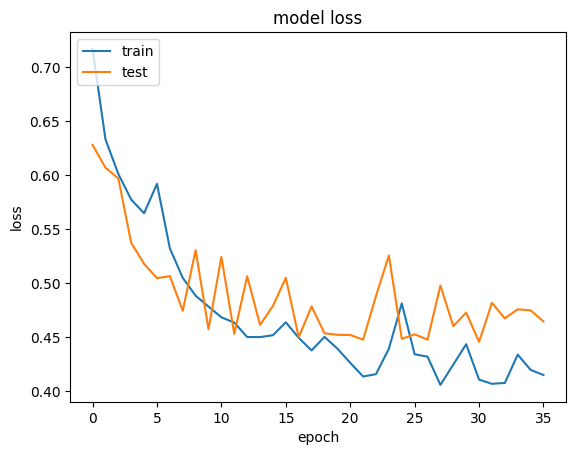

In [21]:
# Early Stopping Callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Model SEtup
model_1 = Sequential([
    Dense(7, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_1.compile(
    loss=BinaryCrossentropy(from_logits=True), 
    optimizer=Adam(0.001)
)

# Model Training
hist = model_1.fit(
    X_train, y_train, 
    epochs=100,
    verbose=0,
    validation_split=0.125,
    callbacks=[early_stopping]
)

# Predictions
y_pred = model_1.predict(X_test).reshape(len(y_test),)
y_pred = (y_pred >= 0.5)
score_1 = accuracy_score(y_test, y_pred)
print(score_1)

# Plot History
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()